# Anotações

- Microdados baixados do [site do INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

- Usamos o [plotnine](https://plotnine.org/)==0.12.4

# Importando pacotes que serão utilizados

In [3]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1')

In [5]:
df.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210057943671    2022               14       M                2   
1  210057516120    2022               14       M                2   
2  210057280536    2022                5       F                1   
3  210055724397    2022                6       M                1   
4  210055097896    2022                4       M                0   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            2                 1                1                2          1   
1            1                 1                1               16          1   
2            2                 1                1                2          1   
3            3                 1                1                2          1   
4            3                 1                1                1          1   

   ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0  ...     B     A     A    A     A    A     A     A     A     A  
1  ...     E     E     B    E     B    B     E     B     E     B  
2  ...     A     A     A    A     A    A     C     A     A     B  
3  ...     B     A     A    C     A    A     C     B     B     B  
4  ...     A     A     A    A     A    A     B     A     A     A  

[5 rows x 76 columns]

# Faxina dos dados

## Missings

Aqui vamos limpar os missing data das colunas em que eles representam a ausência do estudante na prova ou colunas que podem ser interessantes na análise e que os missings não são úteis.


In [6]:
df["NU_NOTA_MT"].isna()

0           True
1           True
2          False
3          False
4           True
           ...  
3476100     True
3476101     True
3476102    False
3476103     True
3476104     True
Name: NU_NOTA_MT, Length: 3476105, dtype: bool

In [7]:
df.NU_NOTA_MT.isna().sum()/df.shape[0]

0.32240395500135927

In [8]:
df1 = df.dropna(subset=['NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_REDACAO',
'SG_UF_ESC',
'TP_DEPENDENCIA_ADM_ESC',
'TP_LOCALIZACAO_ESC',
'TP_SIT_FUNC_ESC',
'TP_ENSINO'
])

In [9]:
df1.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
40  210056717205    2022                5       F                1   
55  210056012033    2022                3       F                1   
57  210056292241    2022                2       M                1   
59  210054772114    2022                3       F                1   
67  210055580862    2022                3       M                1   

    TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
40            3                 1                2                0   
55            1                 1                2                0   
57            3                 1                2                0   
59            3                 1                2                0   
67            1                 1                2                0   

    TP_ESCOLA  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
40          2  ...     A     A     A    B     A    A     C     A     A     B  
55          2  ...     A     A     A    B     A    A     E     A     B     B  
57          2  ...     A     A     A    C     A    A     E     A     C     B  
59          2  ...     A     A     A    C     A    A     A     A     A     B  
67          2  ...     A     A     A    C     B    A     D     B     A     B  

[5 rows x 76 columns]

## Filtrando não treineiros
Aqui estou filtrando os estudantes que não são treineiros, que tiveram a redação corrigida, que tiveram uma nacionalidade informada, e que declarou o tipo de escola em que ele estudou (Pública ou Privada)

In [10]:
df1 = df1.loc[(df['IN_TREINEIRO'] == 0) & (df1['TP_STATUS_REDACAO'] == 1) & (df['TP_COR_RACA'] != 6) &
              (df['TP_NACIONALIDADE'] != 0) & (df['TP_ESCOLA'] != 1)]

In [11]:
df1.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
40  210056717205    2022                5       F                1   
55  210056012033    2022                3       F                1   
57  210056292241    2022                2       M                1   
59  210054772114    2022                3       F                1   
67  210055580862    2022                3       M                1   

    TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
40            3                 1                2                0   
55            1                 1                2                0   
57            3                 1                2                0   
59            3                 1                2                0   
67            1                 1                2                0   

    TP_ESCOLA  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
40          2  ...     A     A     A    B     A    A     C     A     A     B  
55          2  ...     A     A     A    B     A    A     E     A     B     B  
57          2  ...     A     A     A    C     A    A     E     A     C     B  
59          2  ...     A     A     A    C     A    A     A     A     A     B  
67          2  ...     A     A     A    C     B    A     D     B     A     B  

[5 rows x 76 columns]

## Drop colunas que não serão utilizadas

Aqui estou dropando as colunas que não podem não ser úteis na análise, como gabarito, vetores de respostas e notas de competências.

In [12]:
df1 = df1.drop(['NU_ANO',
'TX_GABARITO_CN',
'TX_GABARITO_CH',
'TX_GABARITO_LC',
'TX_GABARITO_MT',
'TP_LINGUA',
'CO_UF_ESC',
'CO_MUNICIPIO_ESC',
'TP_PRESENCA_CN',
'TP_PRESENCA_CH',
'TP_PRESENCA_LC',
'TP_PRESENCA_MT',
'NO_MUNICIPIO_ESC',
'TX_RESPOSTAS_CN',
'TX_RESPOSTAS_CH',
'TX_RESPOSTAS_LC',
'TX_RESPOSTAS_MT',
'CO_PROVA_CN',
'CO_PROVA_CH',
'CO_PROVA_LC',
'CO_PROVA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5'
], axis=1)

<Axes: >

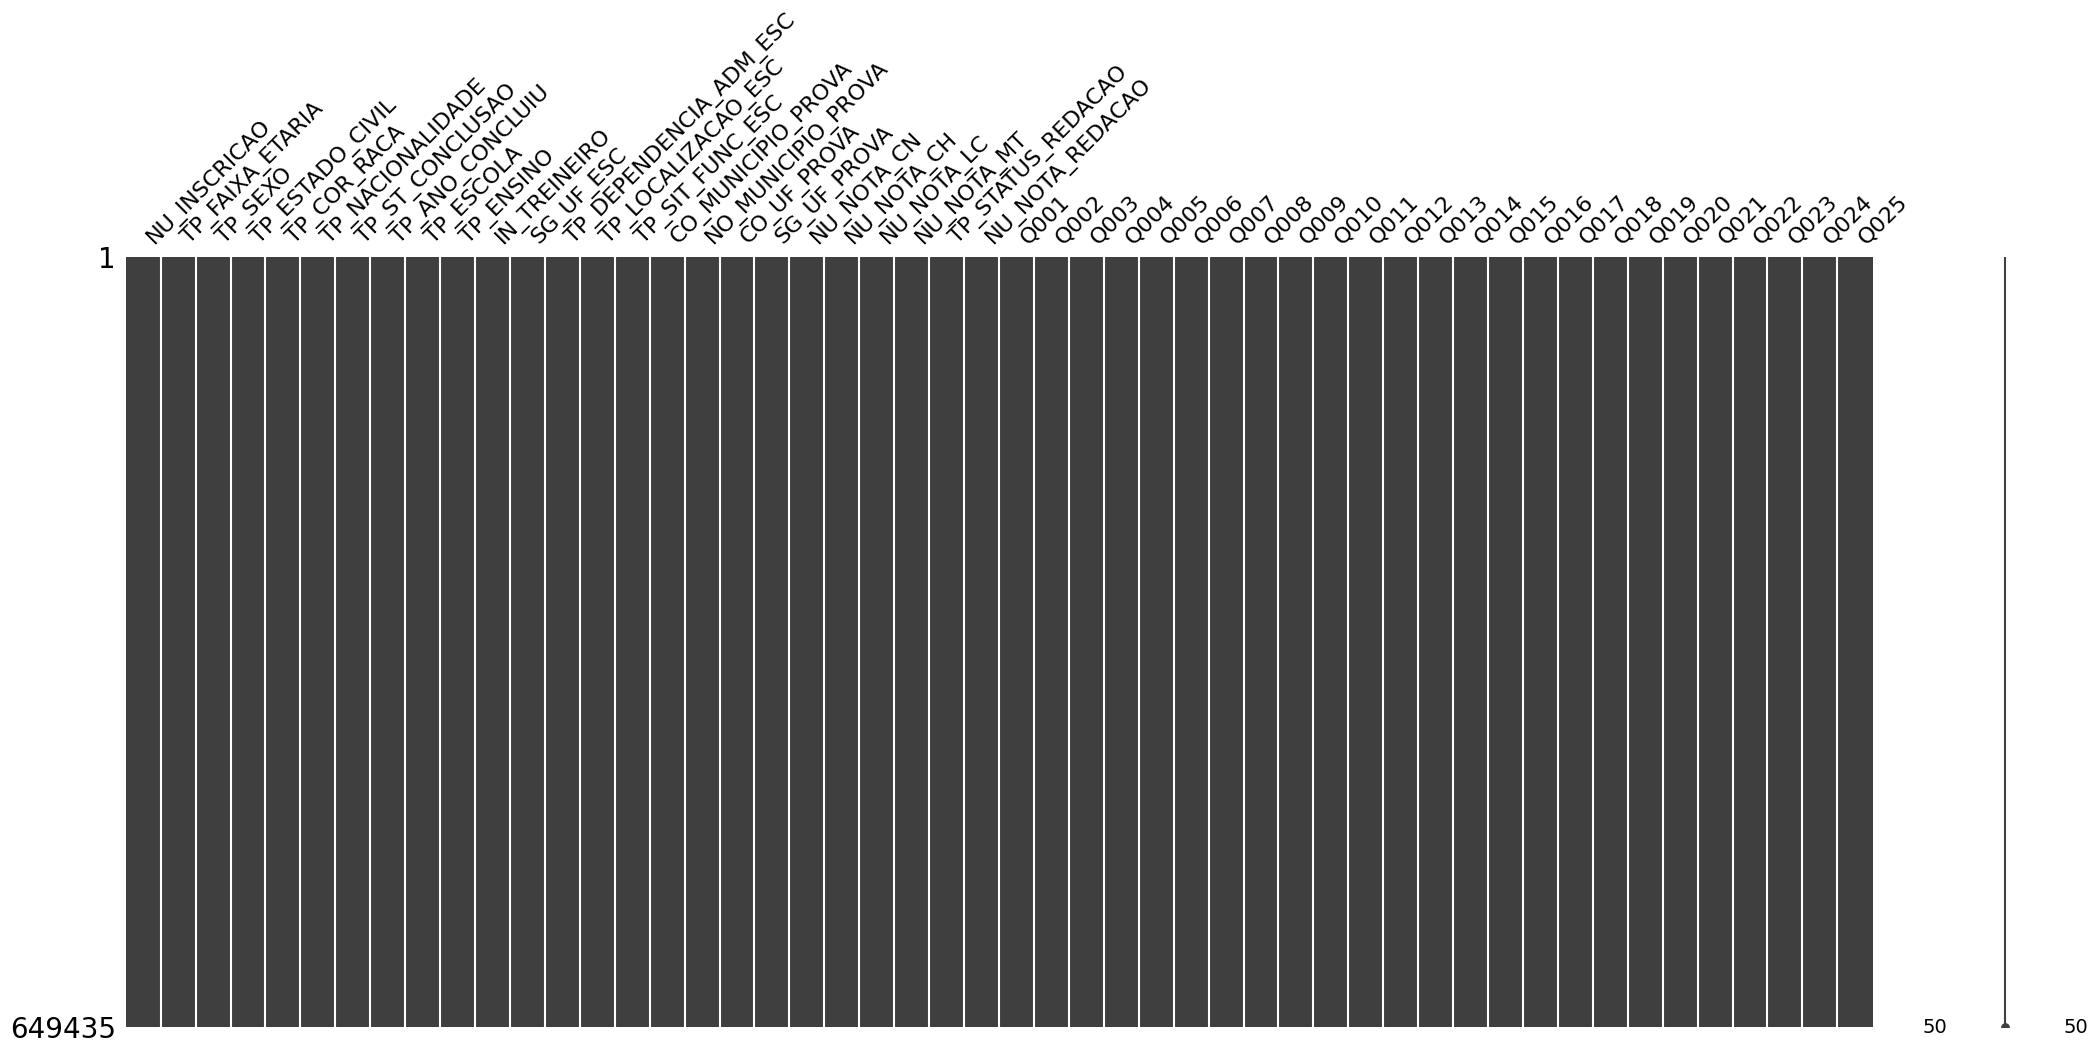

In [13]:
msno.matrix(df1)

In [27]:
print("Numero de observações antes da limpeza nos dados:",df.shape[0])
print("Numero de observações após a limpeza nos dados:",df1.shape[0])

Numero de observações antes da limpeza nos dados: 3476105
Numero de observações após a limpeza nos dados: 649435


# Analisando as notas da prova

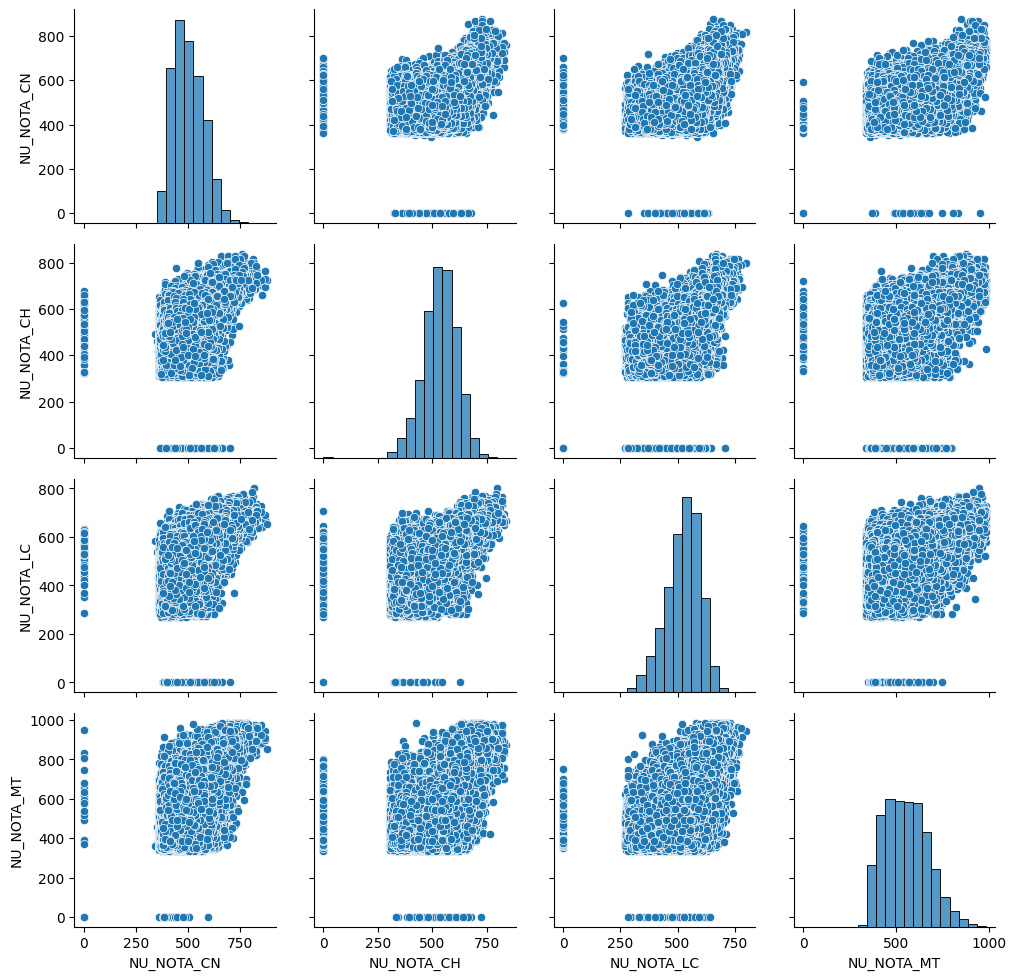

In [15]:
g = sns.PairGrid(df1[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']])
g.map_diag(sns.histplot, bins=20)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Correlação dos desempenhos

In [14]:
dfcorr=df1[['NU_NOTA_MT', 'TP_COR_RACA','TP_ESCOLA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_ANO_CONCLUIU']]

dfcorr.describe()

NU_NOTA_MT    TP_COR_RACA      TP_ESCOLA     NU_NOTA_CN  \
count  649435.000000  649435.000000  649435.000000  649435.000000   
mean      554.405071       1.901792       2.265589     500.756016   
std       115.652034       1.017353       0.441647      71.082216   
min         0.000000       0.000000       2.000000       0.000000   
25%       461.300000       1.000000       2.000000     445.000000   
50%       547.800000       1.000000       2.000000     492.900000   
75%       635.200000       3.000000       3.000000     550.600000   
max       985.700000       5.000000       3.000000     875.300000   

          NU_NOTA_CH     NU_NOTA_LC  TP_ANO_CONCLUIU  
count  649435.000000  649435.000000         649435.0  
mean      534.066430     524.444370              0.0  
std        76.861012      73.785407              0.0  
min         0.000000       0.000000              0.0  
25%       486.200000     478.600000              0.0  
50%       537.400000     532.800000              0.0  
75%       586.500000     577.500000              0.0  
max       839.200000     801.000000              0.0

<Axes: >

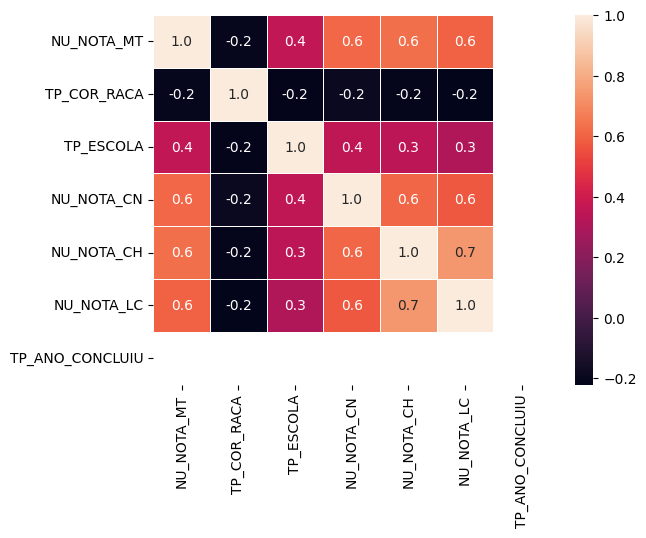

In [23]:
correlation = dfcorr.corr()

# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

## Dicionário de algumas variáveis de interesse

In [92]:
faixa_etaria = {1 : 'Menor de 17 anos',
2 : '17 anos',
3 : '18 anos',
4 : '19 anos',
5 : '20 anos',
6 : '21 anos',
7 : '22 anos',
8 : '23 anos',
9 : '24 anos',
10 : '25 anos',
11 : 'Entre 26 e 30 anos',
12 : 'Entre 31 e 35 anos',
13 : 'Entre 36 e 40 anos',
14 : 'Entre 41 e 45 anos',
15 : 'Entre 46 e 50 anos',
16 : 'Entre 51 e 55 anos',
17 : 'Entre 56 e 60 anos',
18 : 'Entre 61 e 65 anos',
19 : 'Entre 66 e 70 anos',
20 : 'Maior de 70 anos'}

faixa_renda = {'A':'Nenhuma Renda',
'B' :'Até R$ 1.212,00',
'C':'De R$ 1.212,01 até R$ 1.818,00',
'D':'De R$ 1.818,01 até R$ 2.424,00',
'E':'De R$ 2.424,01 até R$ 3.030,00',
'F':'De R$ 3.030,01 até R$ 3.636,00',
'G':'De R$ 3.636,01 até R$ 4.848,00',
'H':'De R$ 4.848,01 até R$ 6.060,00',
'I':'De R$ 6.060,01 até R$ 7.272,00',
'J':'De R$ 7.272,01 até R$ 8.484,00',
'K':'De R$ 8.484,01 até R$ 9.696,00',
'L':'De R$ 9.696,01 até R$ 10.908,00',
'M':'De R$ 10.908,01 até R$ 12.120,00',
'N':'De R$ 12.120,01 até R$ 14.544,00',
'O':'De R$ 14.544,01 até R$ 18.180,00',
'P':'De R$ 18.180,01 até R$ 24.240,00',
'Q':'Acima de R$ 24.240,00'}

faixa_escolaridade = {'A': 'Nunca estudou.',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
'G': 'Completou a Pós-graduação.',
'H': 'Não sei.'}

raca = {0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indígena'}

escola = { 1:'Não Respondeu',
2:'Pública',
3:'Privada'
}


In [93]:
df1['TP_FAIXA_ETARIA'] = df1['TP_FAIXA_ETARIA'].apply(lambda x : faixa_etaria[x])
df1['TP_COR_RACA'] = df1['TP_COR_RACA'].apply(lambda x : raca[x])
df1['Q006'] = df1['Q006'].apply(lambda x : faixa_renda[x])
df1['Q002'] = df1['Q002'].apply(lambda x : faixa_escolaridade[x])
df1['Q001'] = df1['Q001'].apply(lambda x : faixa_escolaridade[x])
df1['TP_ESCOLA'] = df1['TP_ESCOLA'].apply(lambda x : escola[x])

KeyError: '20 anos'

In [18]:
df1['NOTA_FINAL'] = (df1['NU_NOTA_LC'] + df1['NU_NOTA_MT'] + df1['NU_NOTA_CH'] +df1['NU_NOTA_CN'] + df1['NU_NOTA_REDACAO']) / 5

In [21]:
df1['Q002'].value_counts()

Q002
Completou o Ensino Médio, mas não completou a Faculdade.                                   243053
Completou a Faculdade, mas não completou a Pós-graduação.                                  106106
Completou a Pós-graduação.                                                                 105126
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        71872
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     54834
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      40996
Não sei.                                                                                    21665
Nunca estudou.                                                                               5783
Name: count, dtype: int64

# Visualização dos dados

<Axes: xlabel='NOTA_FINAL', ylabel='Q002'>

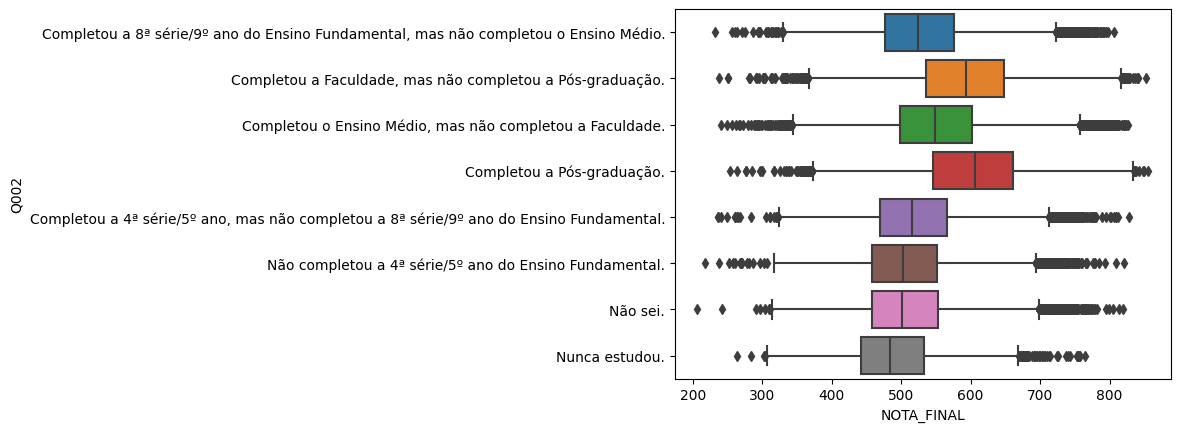

In [20]:
import seaborn as sns

sns.boxplot(data=df1, x="NOTA_FINAL", y="Q002")

<Axes: xlabel='NOTA_FINAL', ylabel='Q001'>

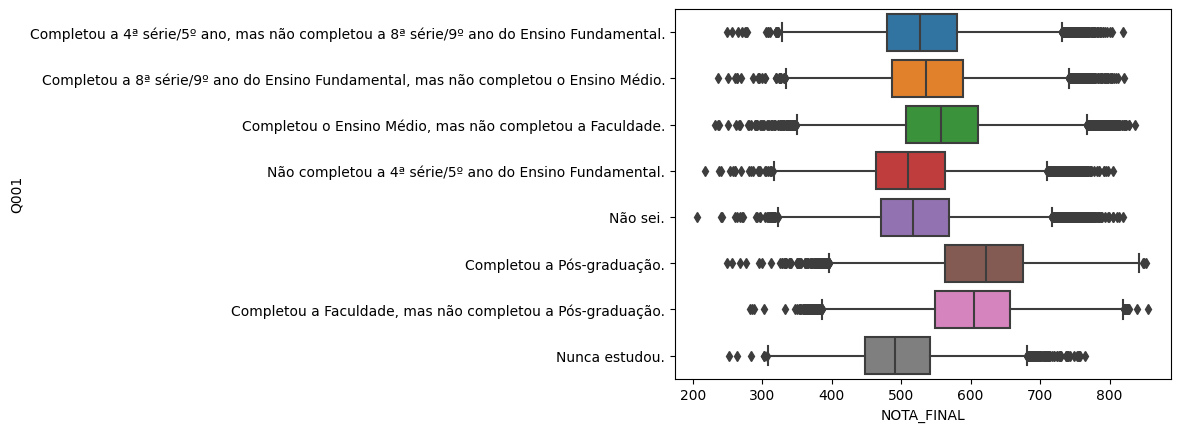

In [22]:
sns.boxplot(data=df1, x="NOTA_FINAL", y="Q001")

<Axes: xlabel='NOTA_FINAL', ylabel='TP_COR_RACA'>

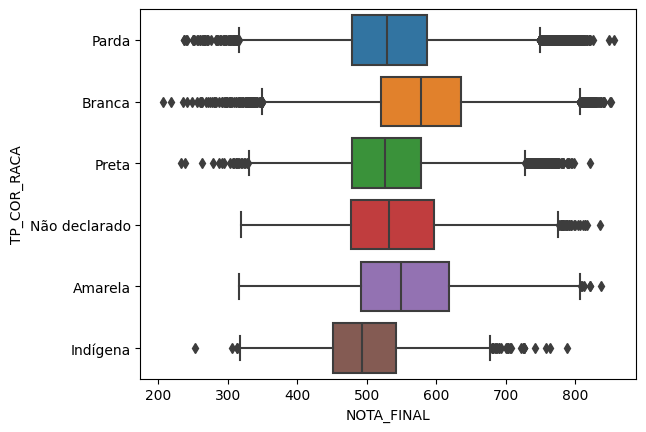

In [23]:
sns.boxplot(data=df1, x="NOTA_FINAL", y="TP_COR_RACA")

<Axes: xlabel='NOTA_FINAL', ylabel='TP_FAIXA_ETARIA'>

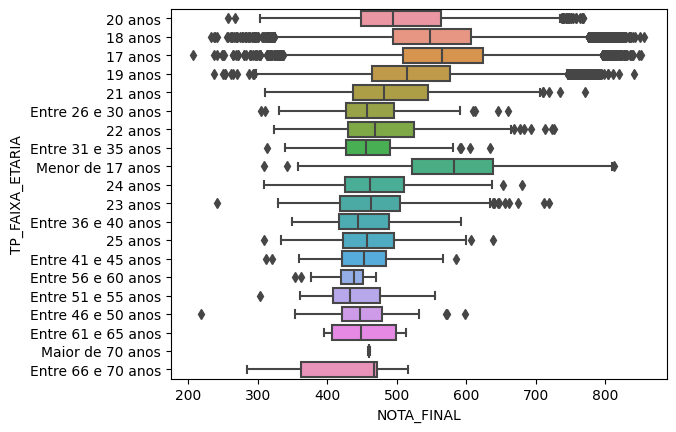

In [24]:
sns.boxplot(data=df1, x="NOTA_FINAL", y="TP_FAIXA_ETARIA")

In [25]:
df1.TP_ESCOLA.value_counts()/df1.shape[0]

TP_ESCOLA
Pública    0.734411
Privada    0.265589
Name: count, dtype: float64

<Axes: xlabel='NOTA_FINAL', ylabel='TP_ESCOLA'>

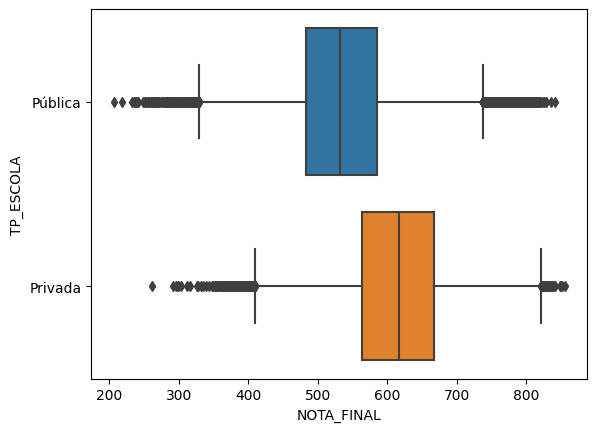

In [39]:
sns.boxplot(data=df1, x="NOTA_FINAL", y="TP_ESCOLA")

<Axes: xlabel='NOTA_FINAL', ylabel='SG_UF_ESC'>

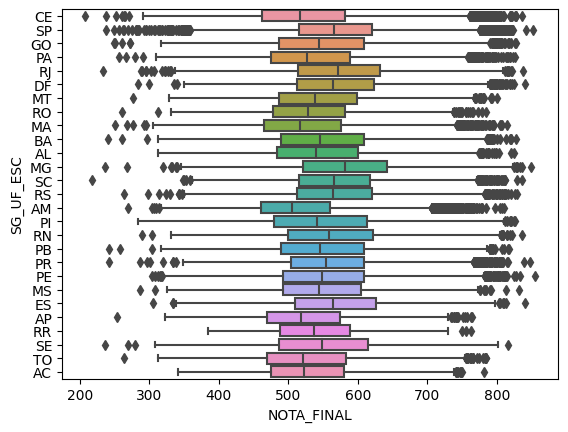

In [43]:
sns.boxplot(data=df1, x="NOTA_FINAL", y="SG_UF_ESC")

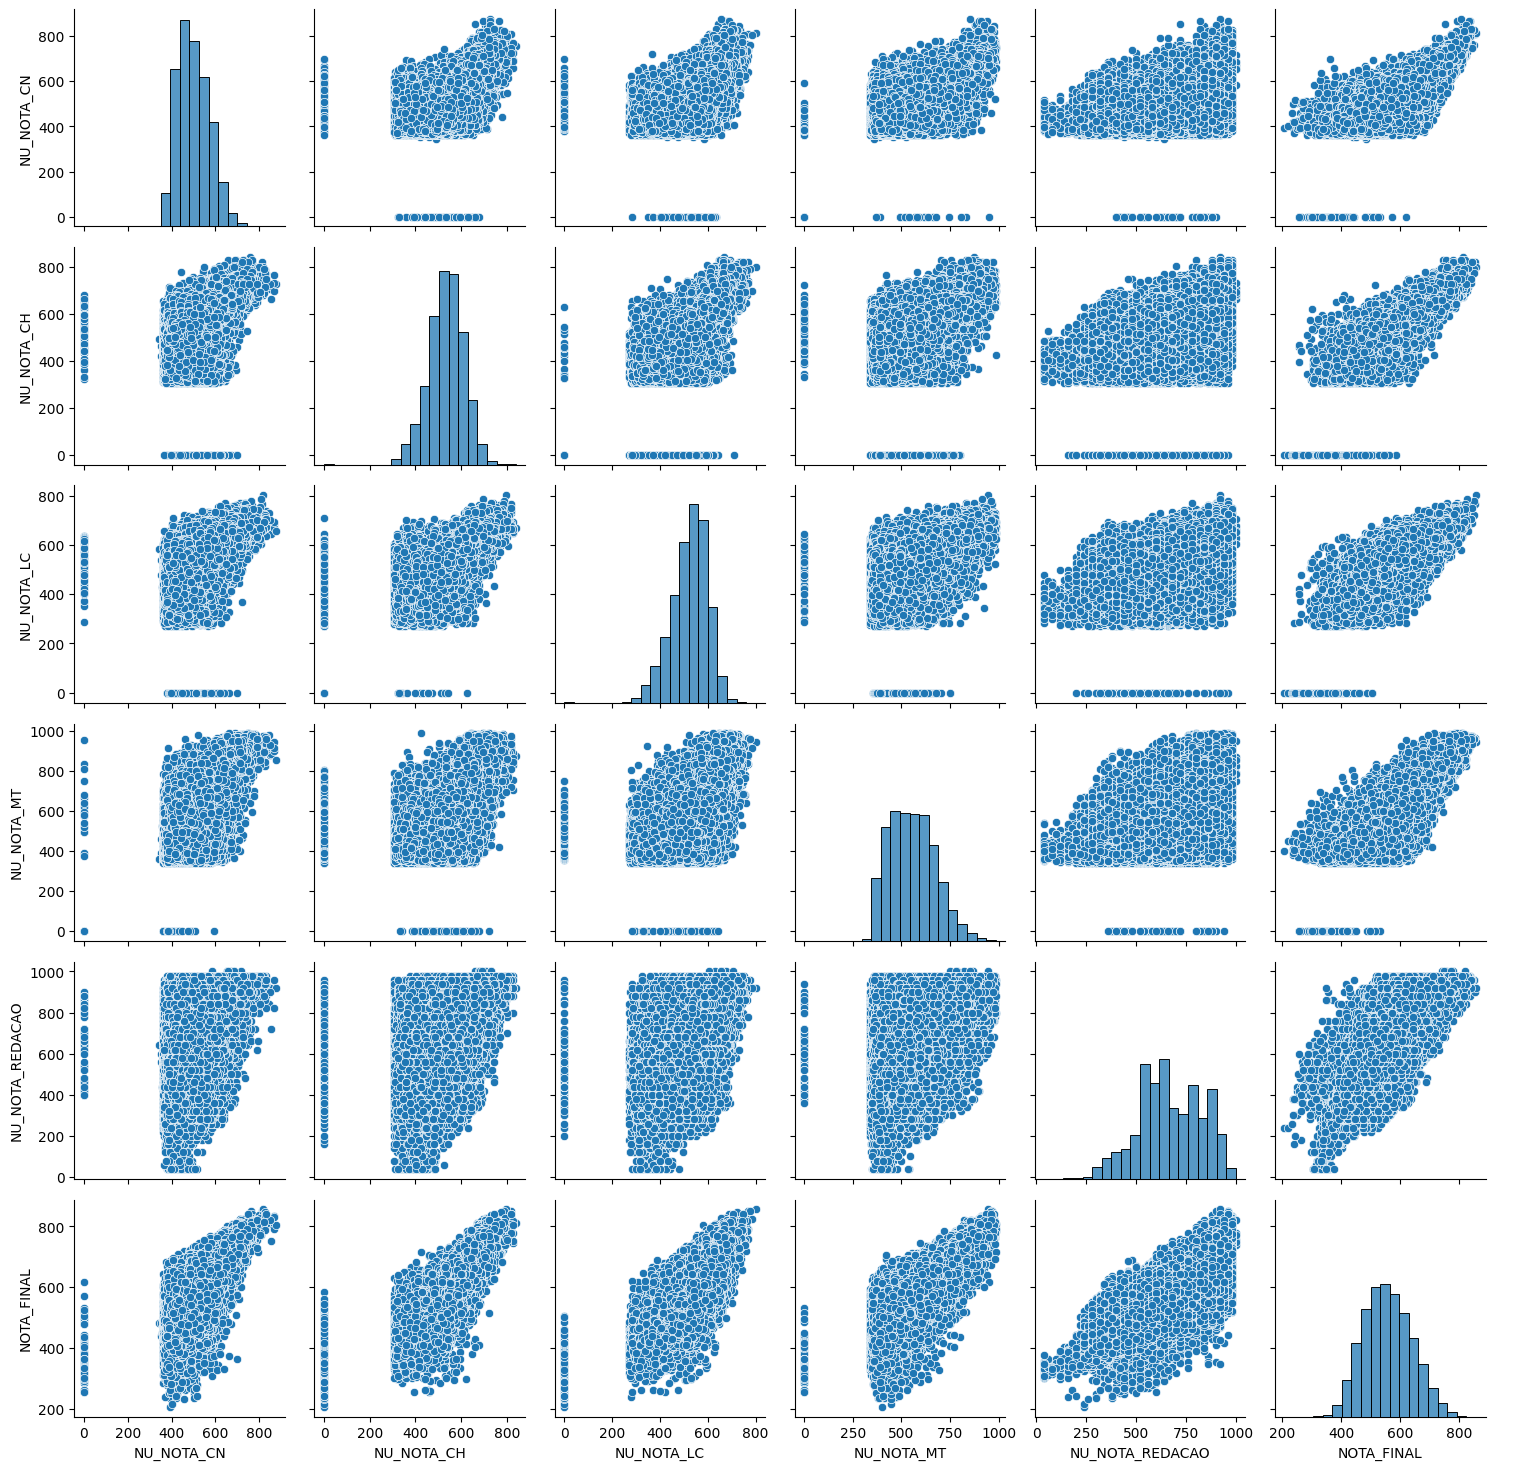

In [44]:
g = sns.PairGrid(df1[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_FINAL']])
g.map_diag(sns.histplot, bins=20)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Análise da nota da Redação

<Axes: xlabel='NU_NOTA_REDACAO', ylabel='TP_COR_RACA'>

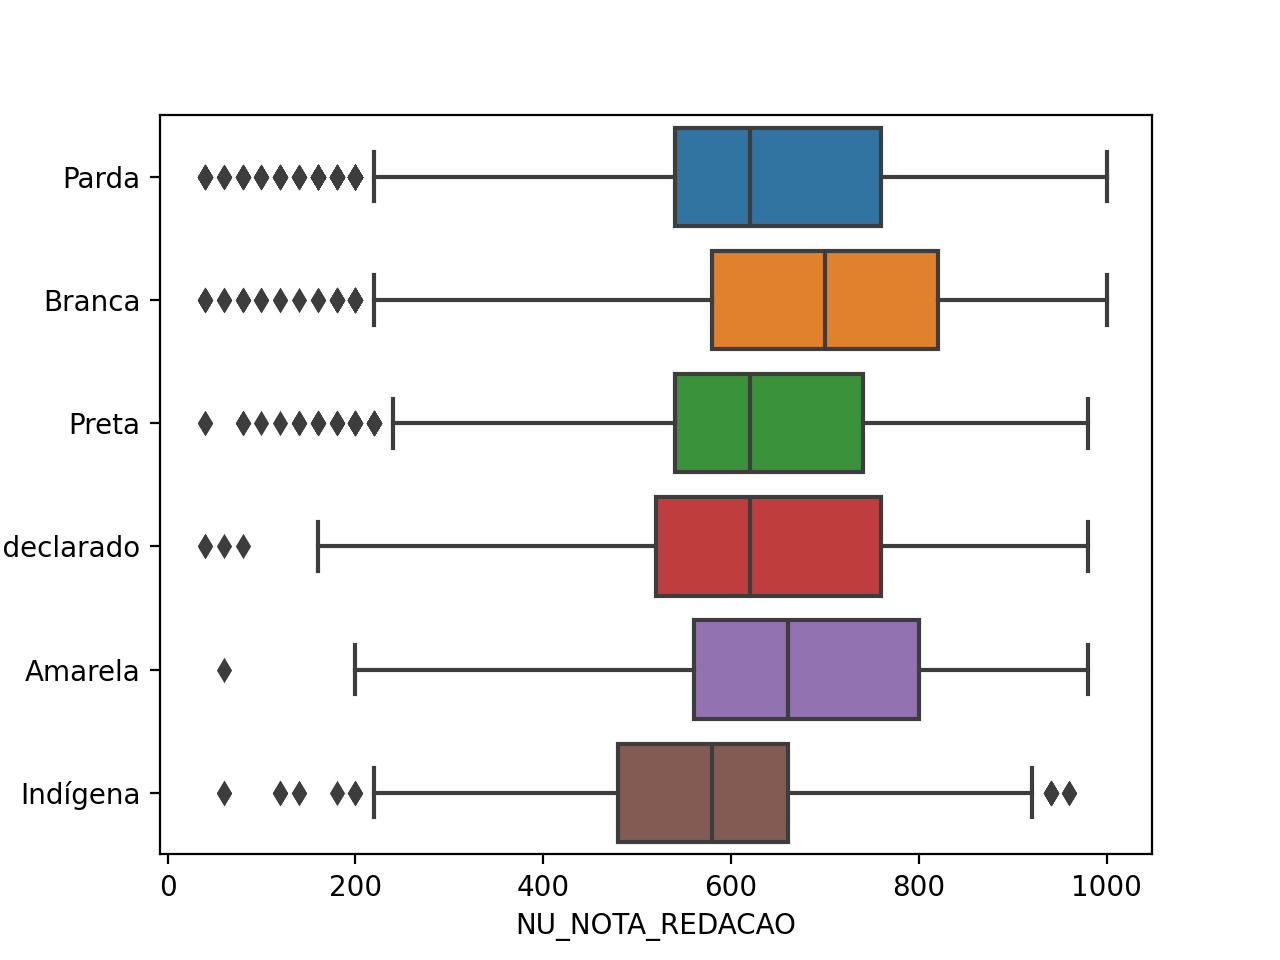

In [63]:
sns.boxplot(data=df1, x="NU_NOTA_REDACAO", y="TP_COR_RACA")

<Axes: xlabel='NU_NOTA_REDACAO', ylabel='TP_ESCOLA'>

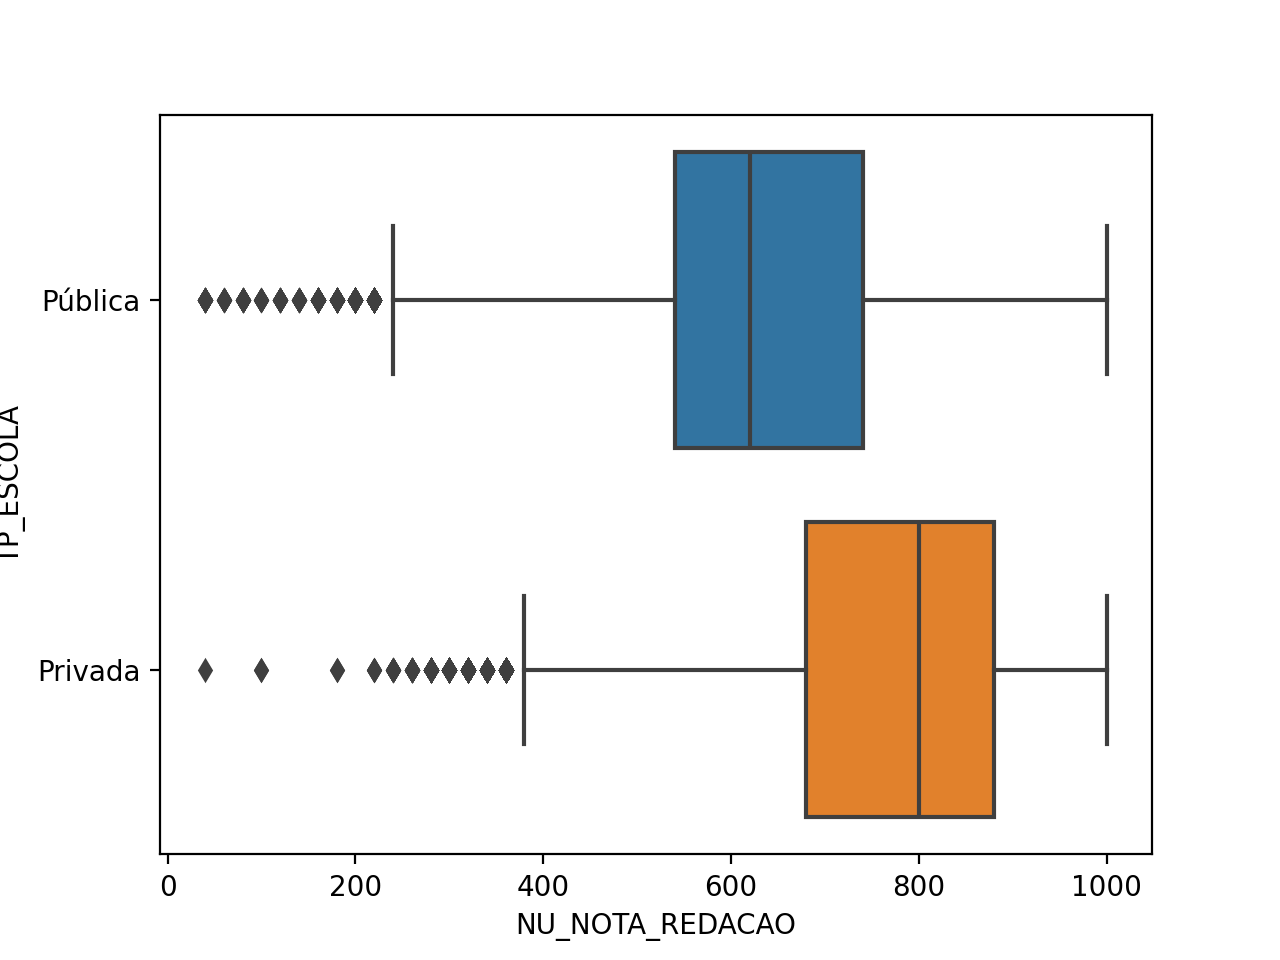

In [64]:
sns.boxplot(data=df1, x="NU_NOTA_REDACAO", y="TP_ESCOLA")

<Axes: xlabel='NU_NOTA_REDACAO', ylabel='TP_SEXO'>

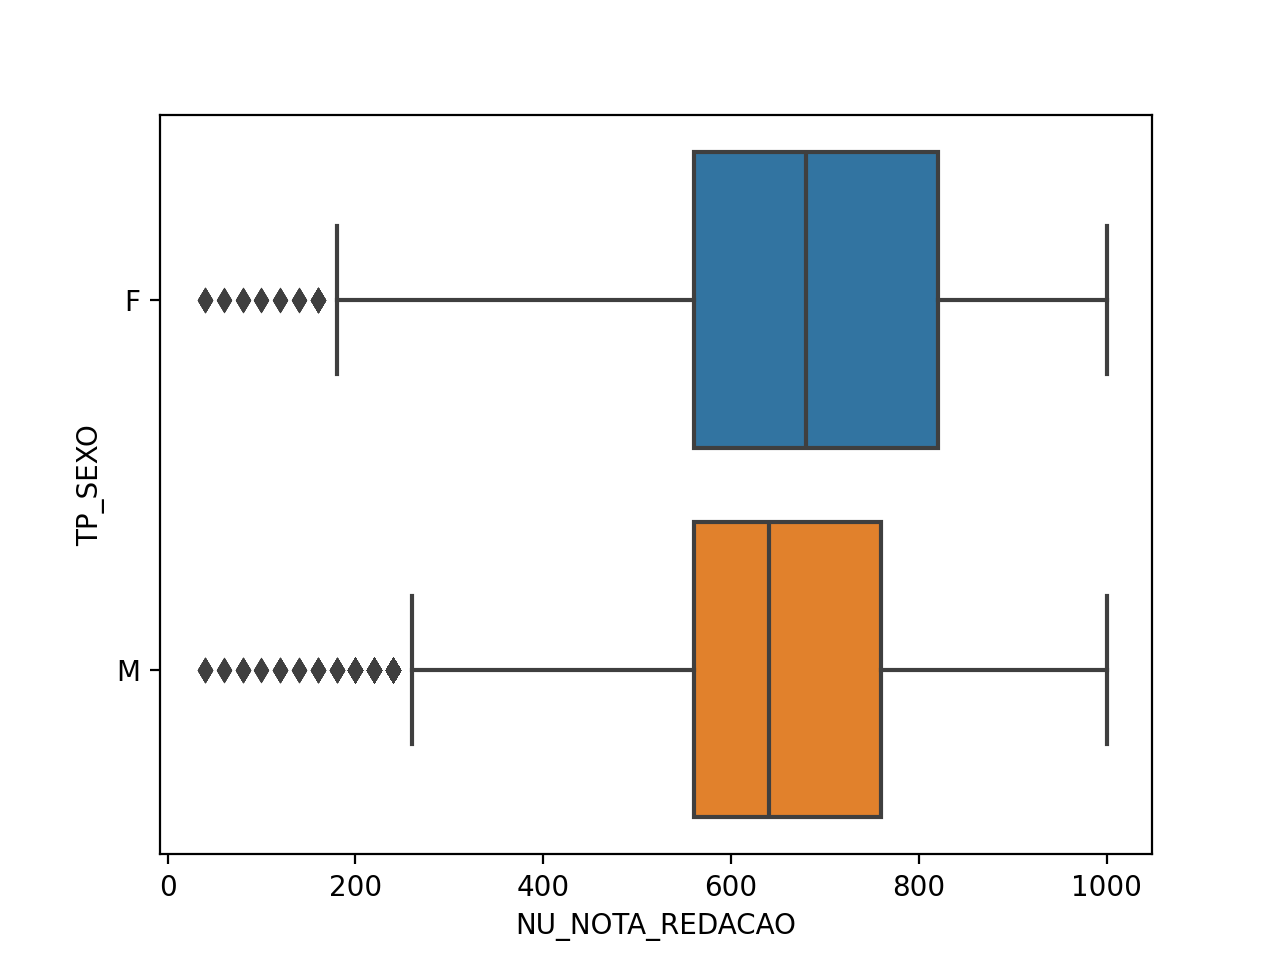

In [69]:
sns.boxplot(data=df1, x="NU_NOTA_REDACAO", y="TP_SEXO")

## Análise por Faixa etária com plotnine

In [46]:
df1.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'NOTA_FINAL'],
      dtype='object')

In [49]:
agrupado = df1.groupby(['TP_FAIXA_ETARIA', 'TP_SEXO']).size().reset_index(name='Contagem')

agrupado.head()

TP_FAIXA_ETARIA TP_SEXO  Contagem
0         17 anos       F    168354
1         17 anos       M    123737
2         18 anos       F    166024
3         18 anos       M    131602
4         19 anos       F     19711

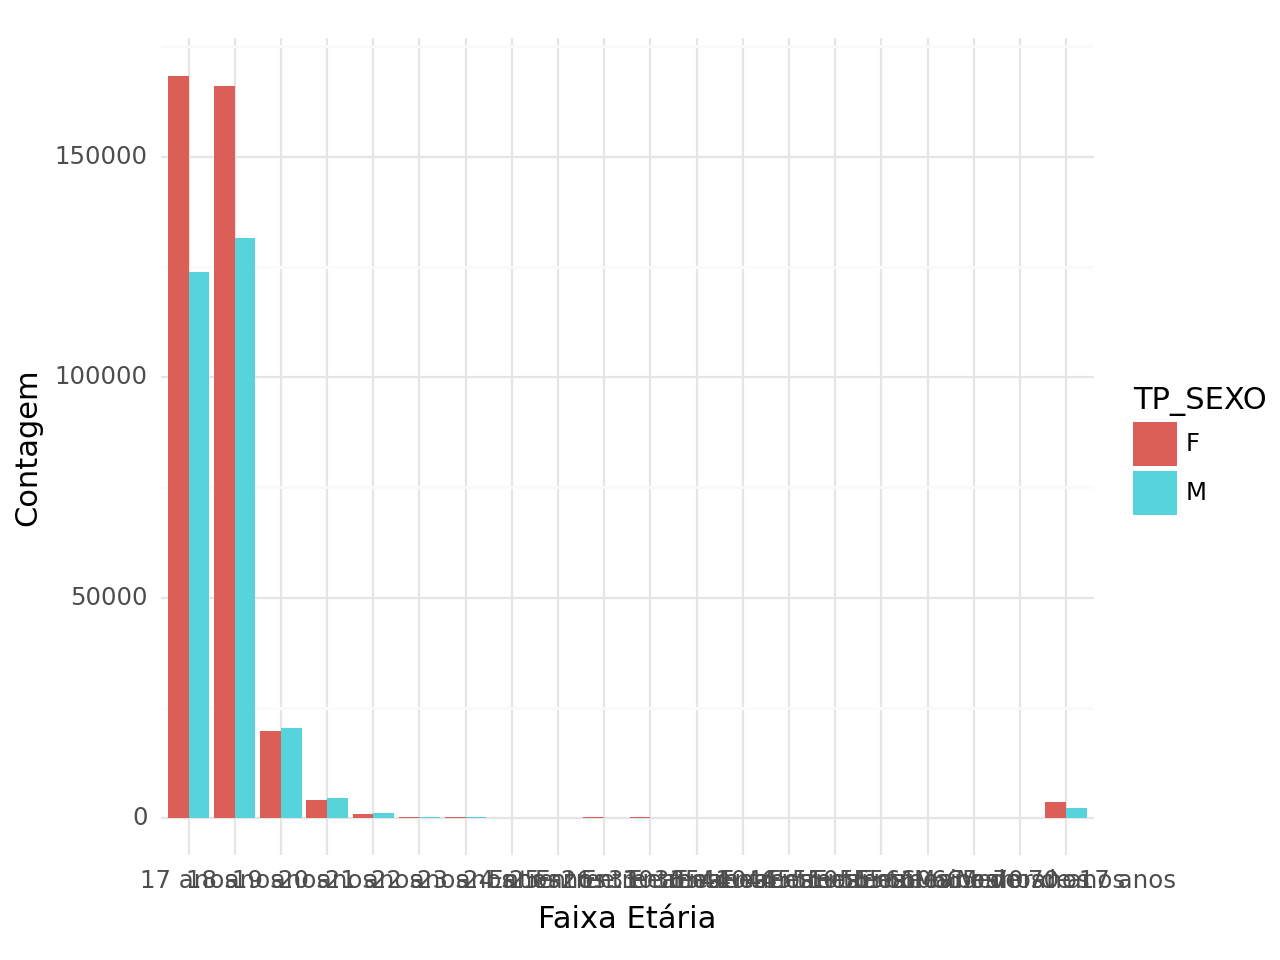

<Figure Size: (640 x 480)>

In [50]:
from plotnine import ggplot, geom_bar, aes, labs, theme_minimal

# Gráfico de barras
(ggplot(agrupado, aes(x = 'TP_FAIXA_ETARIA', y = 'Contagem', fill = 'TP_SEXO')) 
 + geom_bar(stat = "identity", position = "dodge") 
 + labs(x = "Faixa Etária", y = "Contagem") 
 + theme_minimal() 
)

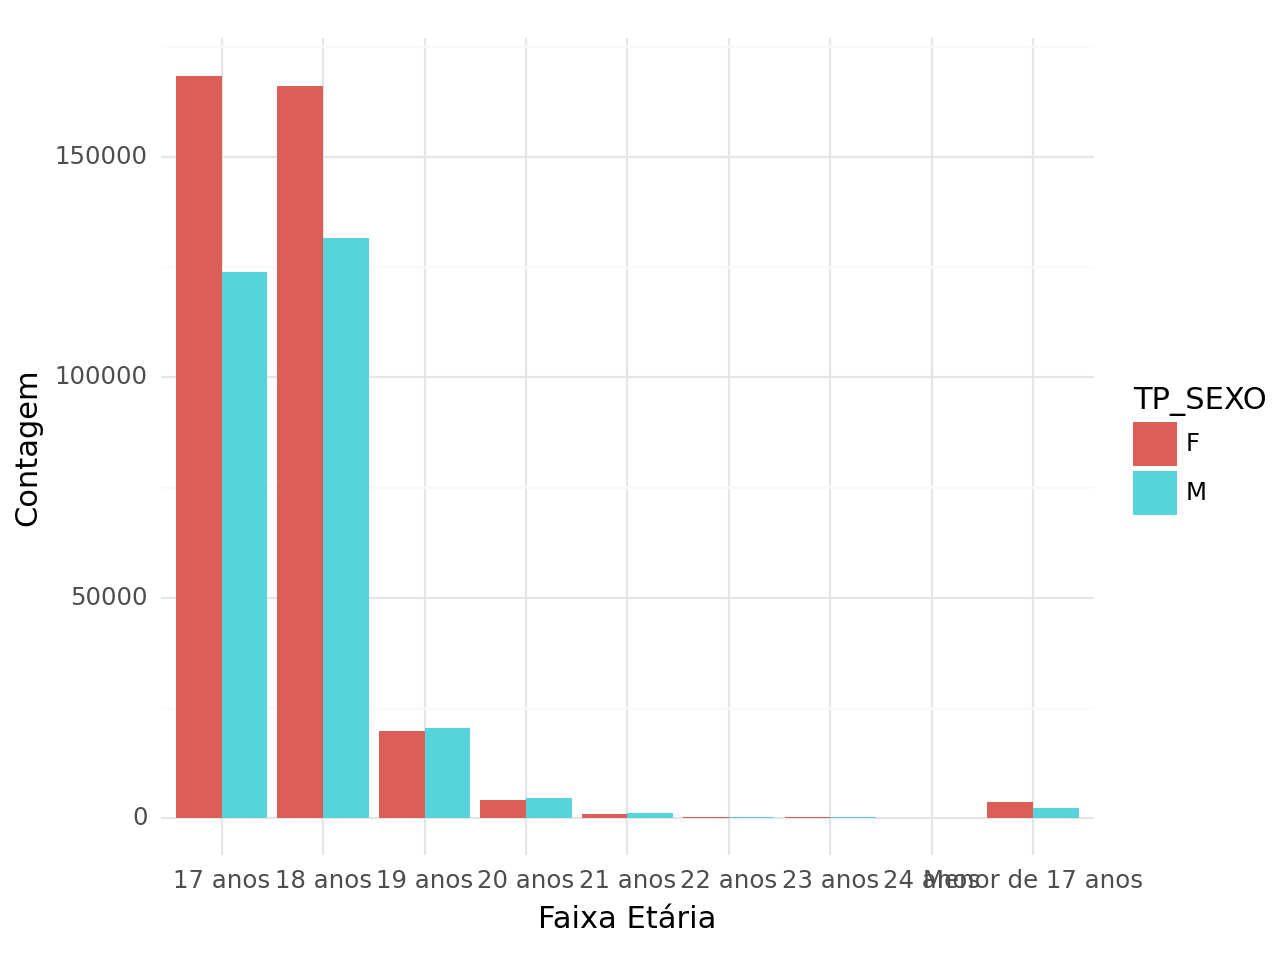

<Figure Size: (640 x 480)>

In [52]:
agrupado = df1[df1['TP_FAIXA_ETARIA'].isin(['Menor de 17 anos','17 anos','18 anos','19 anos','20 anos','21 anos','22 anos',
                                            '23 anos','24 anos'])].groupby(['TP_FAIXA_ETARIA', 'TP_SEXO']).size().reset_index(name='Contagem')

# Gráfico de barras
(ggplot(agrupado, aes(x = 'TP_FAIXA_ETARIA', y = 'Contagem', fill = 'TP_SEXO')) 
 + geom_bar(stat = "identity", position = "dodge") 
 + labs(x = "Faixa Etária", y = "Contagem") 
 + theme_minimal() 
)

## Analisando Dados de Escolaridade da Mãe

In [59]:
df1.Q002.value_counts()

Q002
Completou o Ensino Médio, mas não completou a Faculdade.                                   243053
Completou a Faculdade, mas não completou a Pós-graduação.                                  106106
Completou a Pós-graduação.                                                                 105126
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.        71872
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.     54834
Não completou a 4ª série/5º ano do Ensino Fundamental.                                      40996
Não sei.                                                                                    21665
Nunca estudou.                                                                               5783
Name: count, dtype: int64

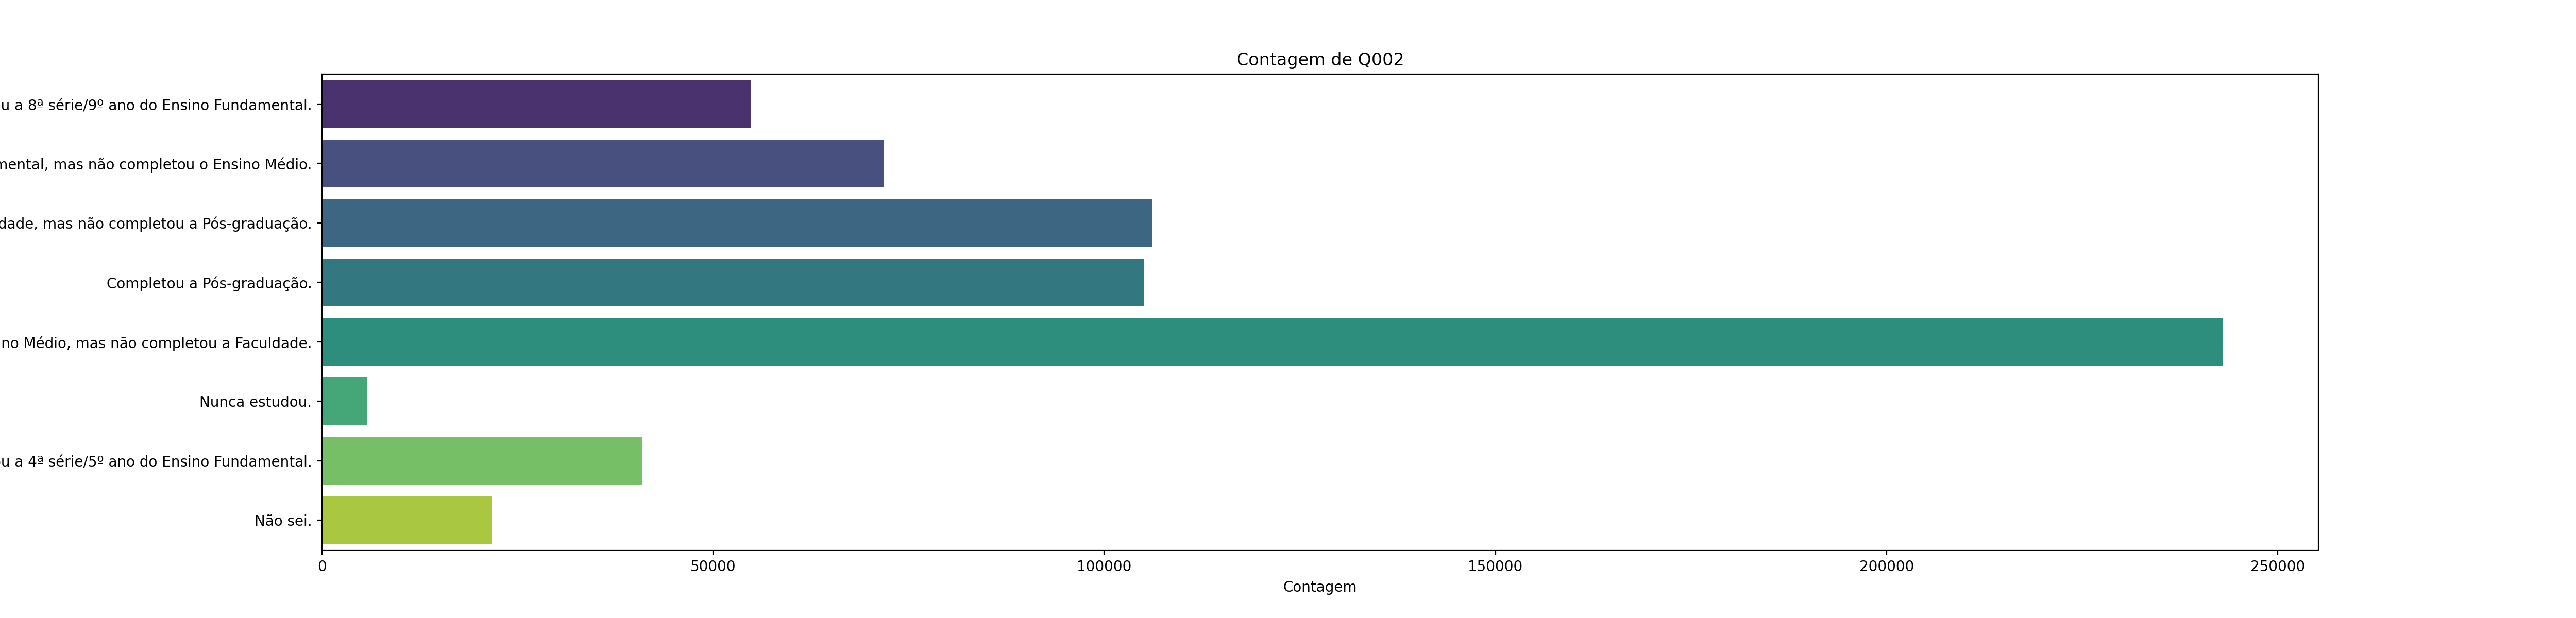

In [58]:
agrupado = df1.groupby('Q002').size().reset_index(name='Contagem')

# Criação do gráfico de barras horizontais
plt.figure(figsize=(25, 6))
sns.barplot(x='Contagem', y='Q002', data=agrupado, palette='viridis')
plt.xlabel('Contagem')
plt.ylabel('Q002')
plt.title('Contagem de Q002')
plt.show()

In [61]:
# Seleciona as colunas 'NU_NOTA_MT' e 'Q002'
selecionado = df1[['NU_NOTA_MT', 'Q002']]

# Agrupa pelo valor da coluna 'Q002' e calcula a média de NU_NOTA_MT
agrupado = selecionado.groupby('Q002')['NU_NOTA_MT'].mean().reset_index(name='media_NU_NOTA_MT')

# Ordena em ordem decrescente pela média de NU_NOTA_MT
agrupado = agrupado.sort_values(by='media_NU_NOTA_MT', ascending=False)
agrupado

Q002  media_NU_NOTA_MT
3                         Completou a Pós-graduação.        611.527613
2  Completou a Faculdade, mas não completou a Pós...        599.038433
4  Completou o Ensino Médio, mas não completou a ...        547.192698
1  Completou a 8ª série/9º ano do Ensino Fundamen...        519.532289
0  Completou a 4ª série/5º ano, mas não completou...        509.529930
7                                           Não sei.        503.122566
6  Não completou a 4ª série/5º ano do Ensino Fund...        494.565060
5                                     Nunca estudou.        475.441449

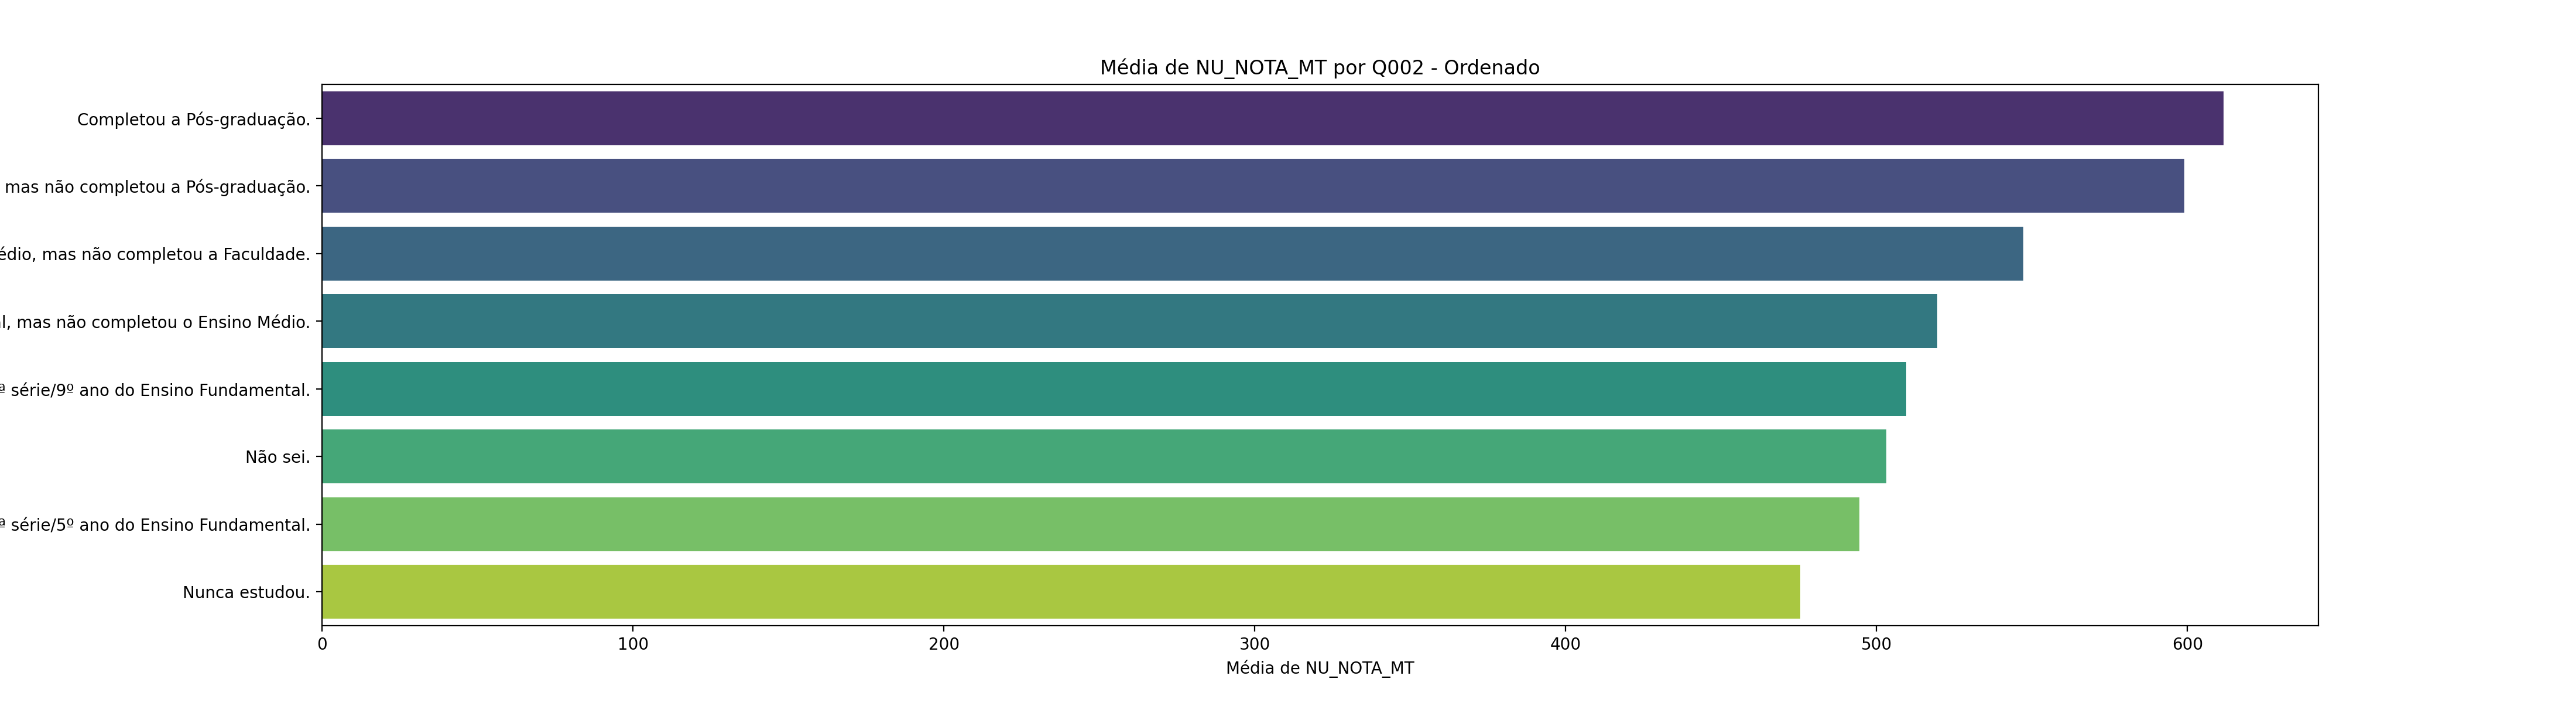

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cores_personalizadas = sns.color_palette("viridis", n_colors=len(agrupado))

# Criação do gráfico de barras ordenado por 'media_NU_NOTA_MT'
plt.figure(figsize=(22, 6))
sns.barplot(x='media_NU_NOTA_MT', y='Q002', data=agrupado, order=agrupado.sort_values('media_NU_NOTA_MT', ascending=False)['Q002'], palette=cores_personalizadas)
plt.xlabel('Média de NU_NOTA_MT')
plt.ylabel('Q002')
plt.title('Média de NU_NOTA_MT por Q002 - Ordenado')
plt.show()


## Analisando Dados de Escolaridade do Pai

In [53]:
# Seleciona as colunas 'NU_NOTA_MT' e 'Q001'
selecionado = df1[['NU_NOTA_MT', 'Q001']]

# Agrupa pelo valor da coluna 'Q001' e calcula a média de NU_NOTA_MT
agrupado = selecionado.groupby('Q001')['NU_NOTA_MT'].mean().reset_index(name='media_NU_NOTA_MT')

# Ordena em ordem decrescente pela média de NU_NOTA_MT
agrupado = agrupado.sort_values(by='media_NU_NOTA_MT', ascending=False)
agrupado

Q001  media_NU_NOTA_MT
3                         Completou a Pós-graduação.        632.698229
2  Completou a Faculdade, mas não completou a Pós...        611.958366
4  Completou o Ensino Médio, mas não completou a ...        557.170374
1  Completou a 8ª série/9º ano do Ensino Fundamen...        532.371555
0  Completou a 4ª série/5º ano, mas não completou...        523.453600
7                                           Não sei.        514.026409
6  Não completou a 4ª série/5º ano do Ensino Fund...        504.515138
5                                     Nunca estudou.        482.547147

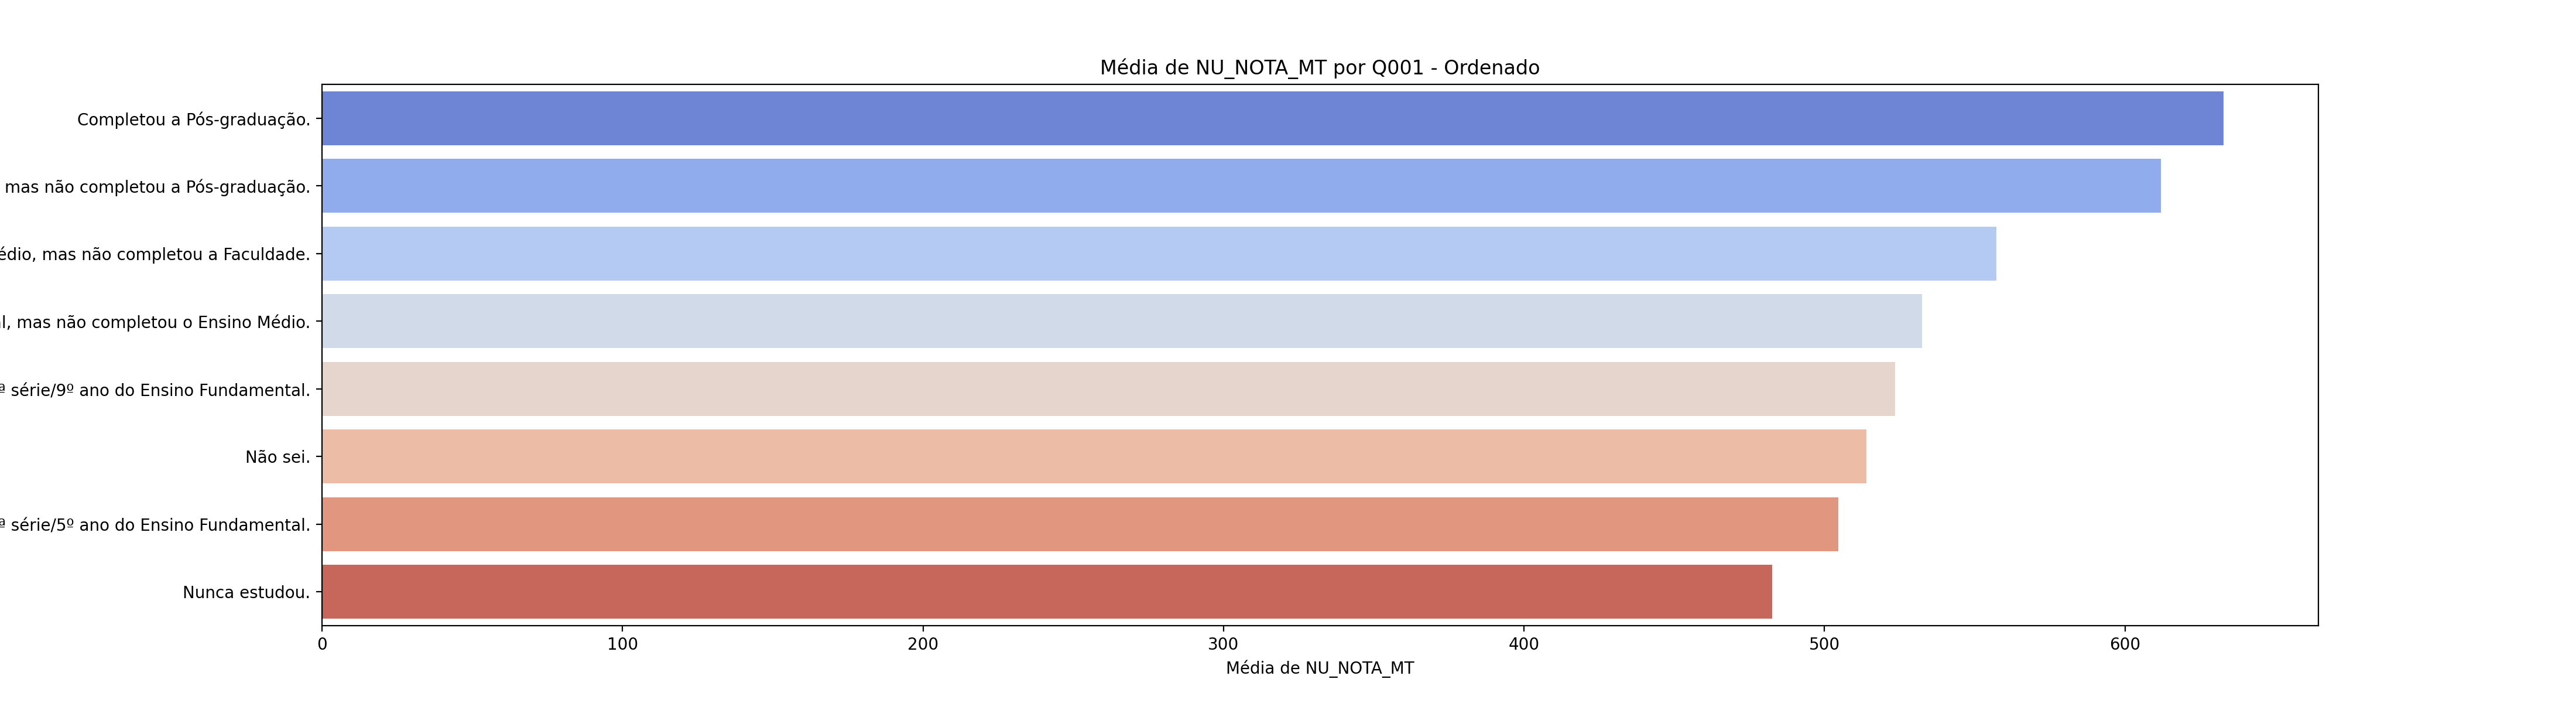

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cores_personalizadas = sns.color_palette("coolwarm", n_colors=len(agrupado))

# Criação do gráfico de barras ordenado por 'media_NU_NOTA_MT'
plt.figure(figsize=(22, 6))
sns.barplot(x='media_NU_NOTA_MT', y='Q001', data=agrupado, order=agrupado.sort_values('media_NU_NOTA_MT', ascending=False)['Q001'], palette=cores_personalizadas)
plt.xlabel('Média de NU_NOTA_MT')
plt.ylabel('Q001')
plt.title('Média de NU_NOTA_MT por Q001 - Ordenado')
plt.show()


## Será que conseguimos analisar alguma info de quem não foi na prova?

In [84]:
# Criar nova coluna indicando 1 se preenchida, 0 se missing
df['indicador'] = df['NU_NOTA_MT'].apply(lambda x: "Presente" if pd.notna(x) else "Ausente")
df['indicador'].value_counts()

indicador
Presente    2355395
Ausente     1120710
Name: count, dtype: int64

In [86]:
agrupado['Contagem']/df.shape[0]

0    0.195116
1    0.414912
2    0.127288
3    0.262685
Name: Contagem, dtype: float64

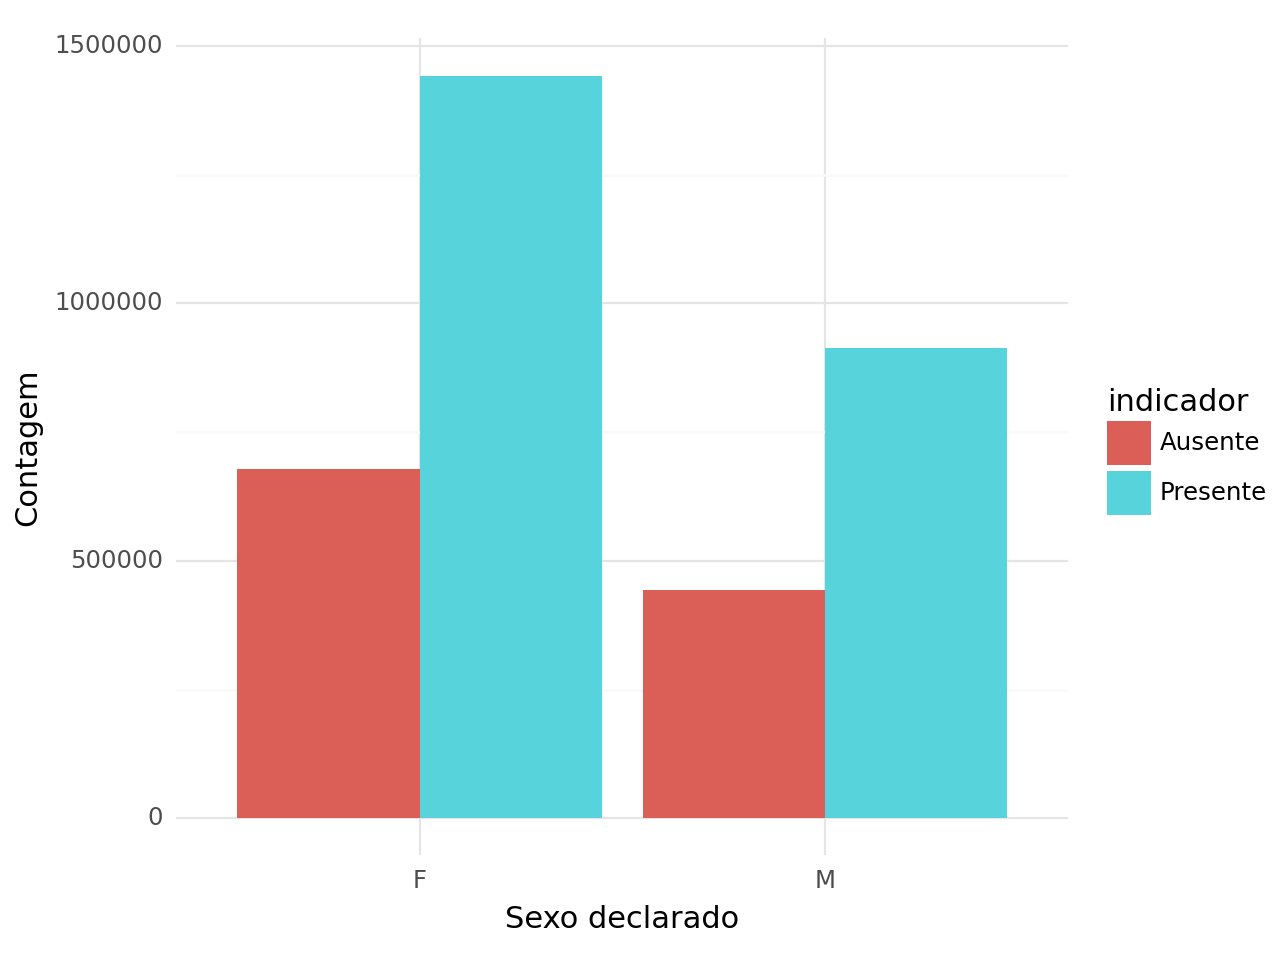

<Figure Size: (640 x 480)>

In [87]:
agrupado = df.groupby(['TP_SEXO','indicador']).size().reset_index(name='Contagem')

(ggplot(agrupado, aes(x = 'TP_SEXO', y = 'Contagem', fill = 'indicador')) 
 + geom_bar(stat = "identity", position = "dodge") 
 + labs(x = "Sexo declarado", y = "Contagem") 
 + theme_minimal() 
)

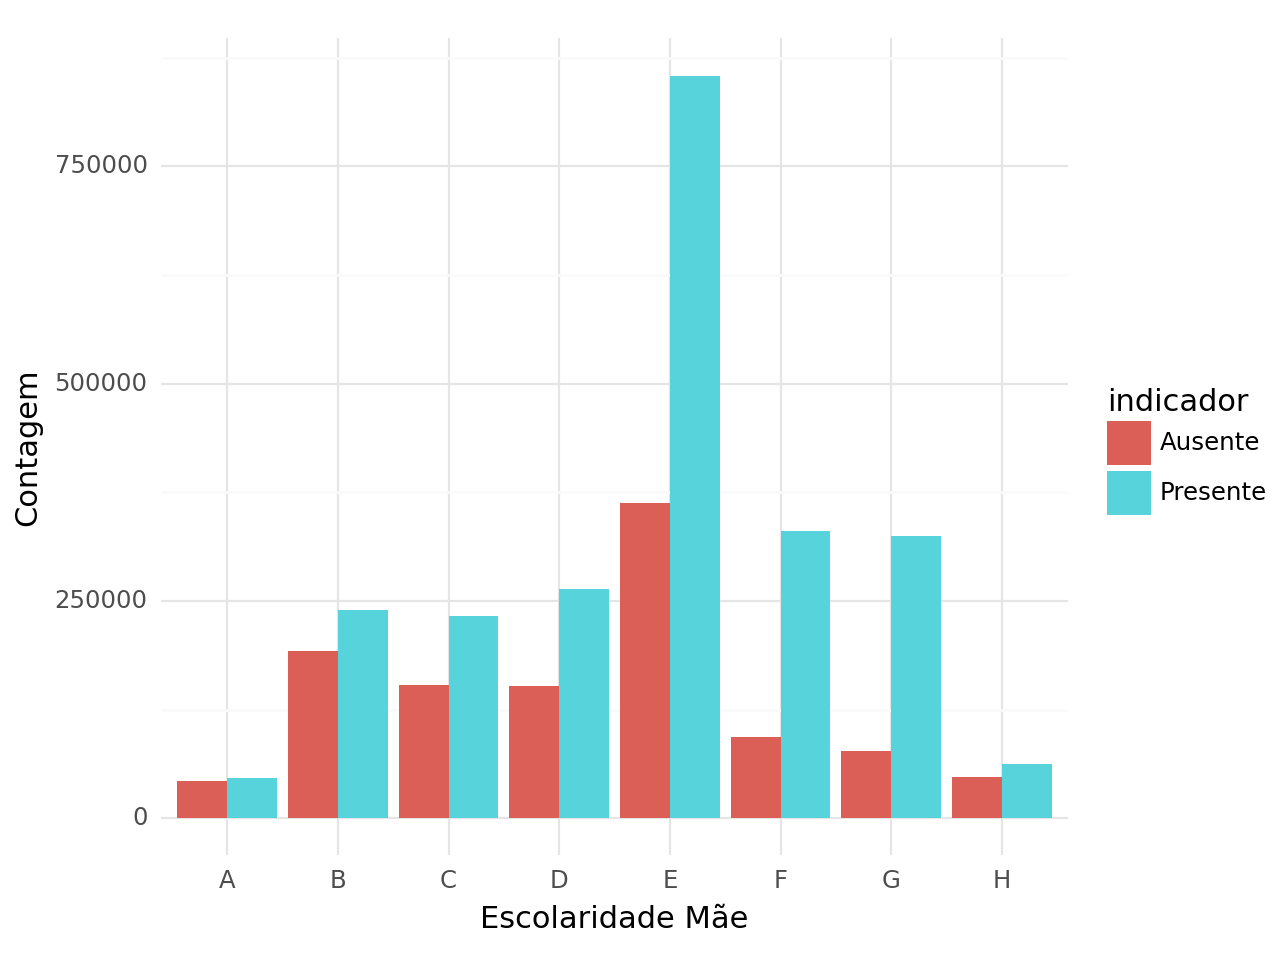

<Figure Size: (640 x 480)>

In [88]:
agrupado = df.groupby(['Q002','indicador']).size().reset_index(name='Contagem')

(ggplot(agrupado, aes(x = 'Q002', y = 'Contagem', fill = 'indicador')) 
 + geom_bar(stat = "identity", position = "dodge") 
 + labs(x = "Escolaridade Mãe", y = "Contagem") 
 + theme_minimal() 
)

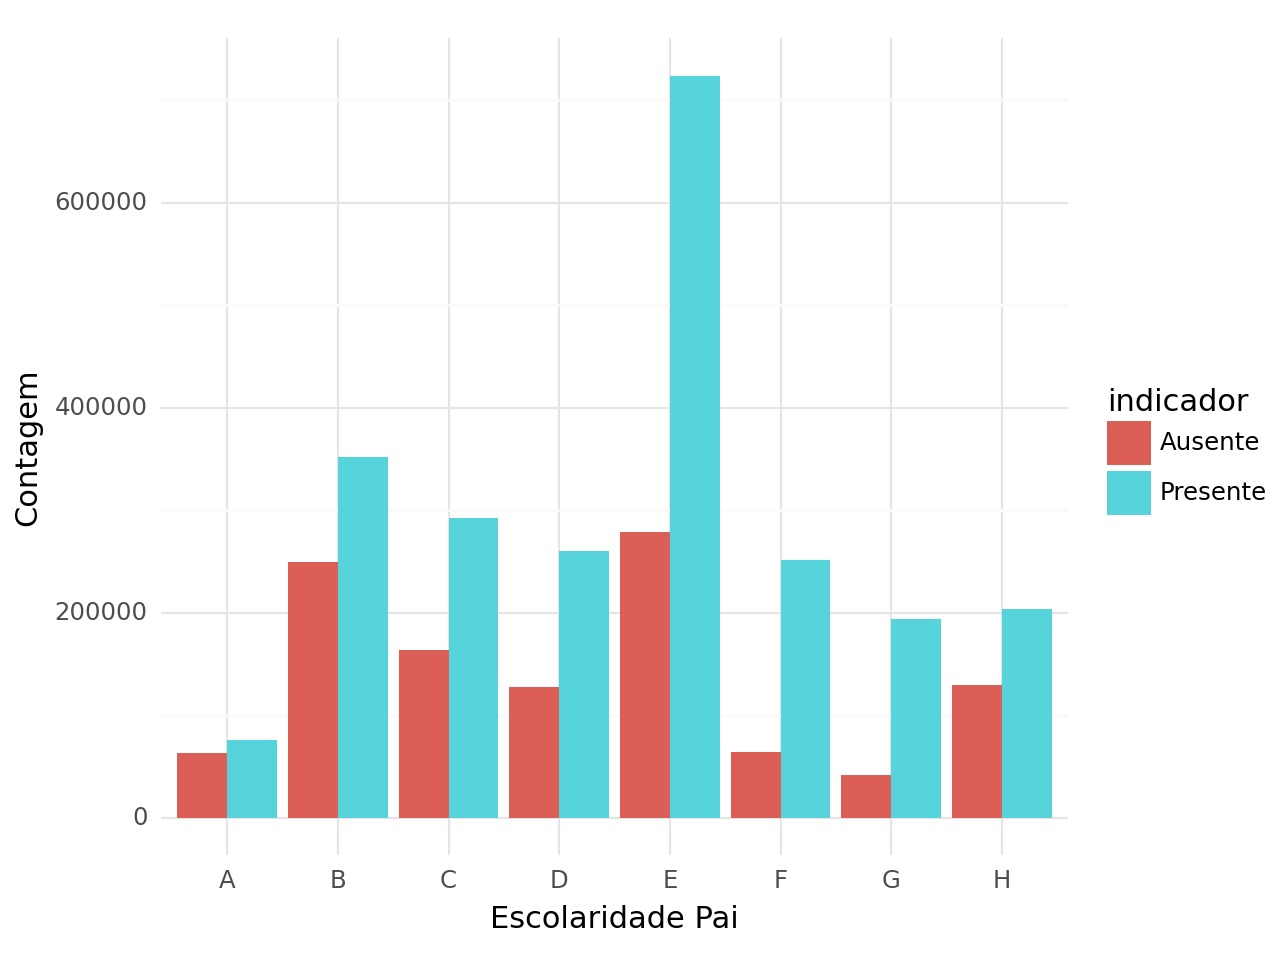

<Figure Size: (640 x 480)>

In [89]:
agrupado = df.groupby(['Q001','indicador']).size().reset_index(name='Contagem')

(ggplot(agrupado, aes(x = 'Q001', y = 'Contagem', fill = 'indicador')) 
 + geom_bar(stat = "identity", position = "dodge") 
 + labs(x = "Escolaridade Pai", y = "Contagem") 
 + theme_minimal() 
)

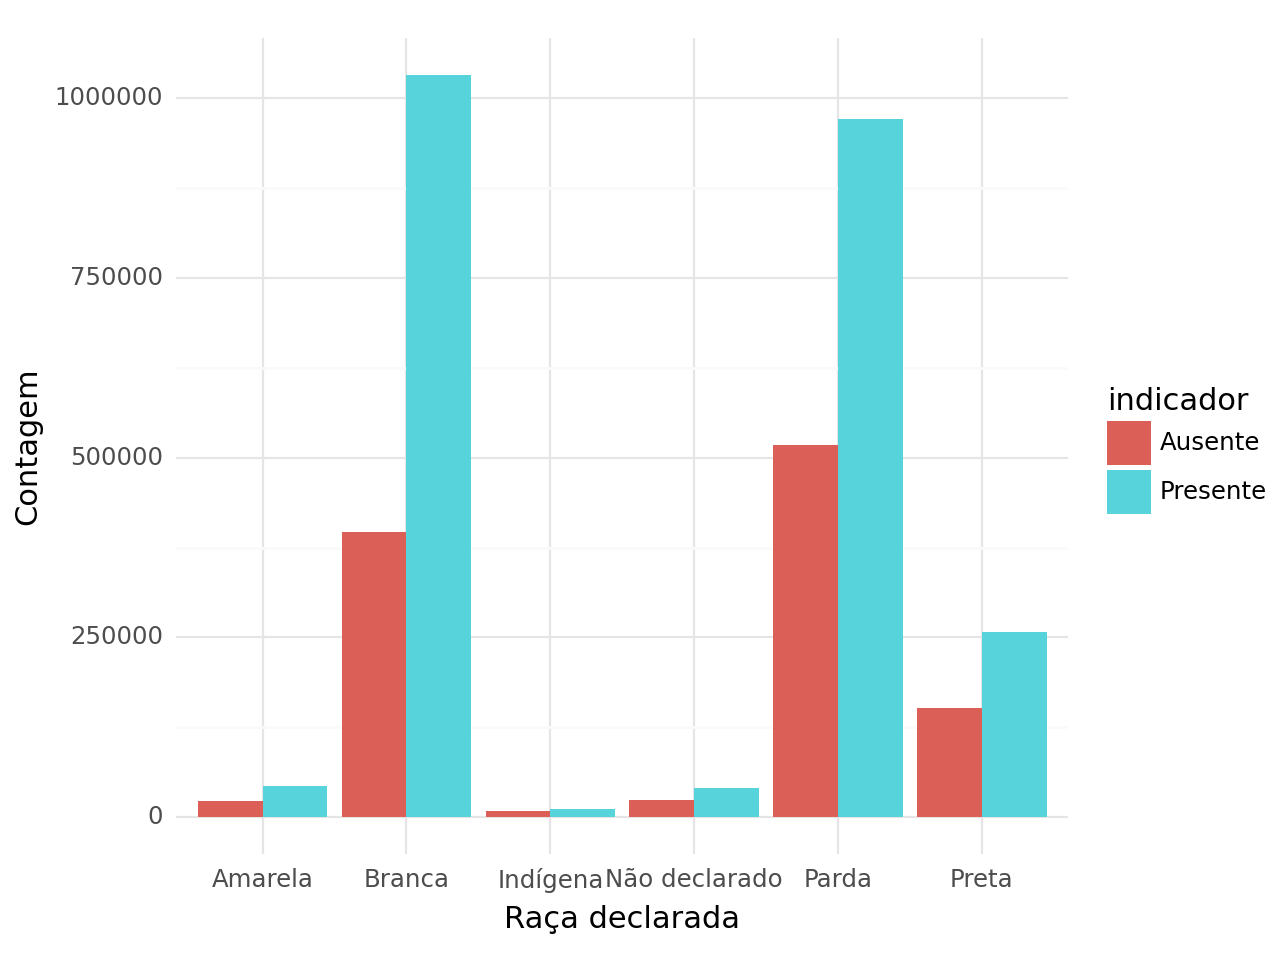

<Figure Size: (640 x 480)>

In [94]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].apply(lambda x : raca[x])
agrupado = df.groupby(['TP_COR_RACA','indicador']).size().reset_index(name='Contagem')

(ggplot(agrupado, aes(x = 'TP_COR_RACA', y = 'Contagem', fill = 'indicador')) 
 + geom_bar(stat = "identity", position = "dodge") 
 + labs(x = "Raça declarada", y = "Contagem") 
 + theme_minimal() 
)

# Agrupamento Kmeans

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\acustodio\anaconda3\envs\py_310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\acustodio\AppData\Local\Temp\ipykernel_24236\2897505314.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\acustodio\anaconda3\envs\py_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\acustodio\anaconda3\envs\py_310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

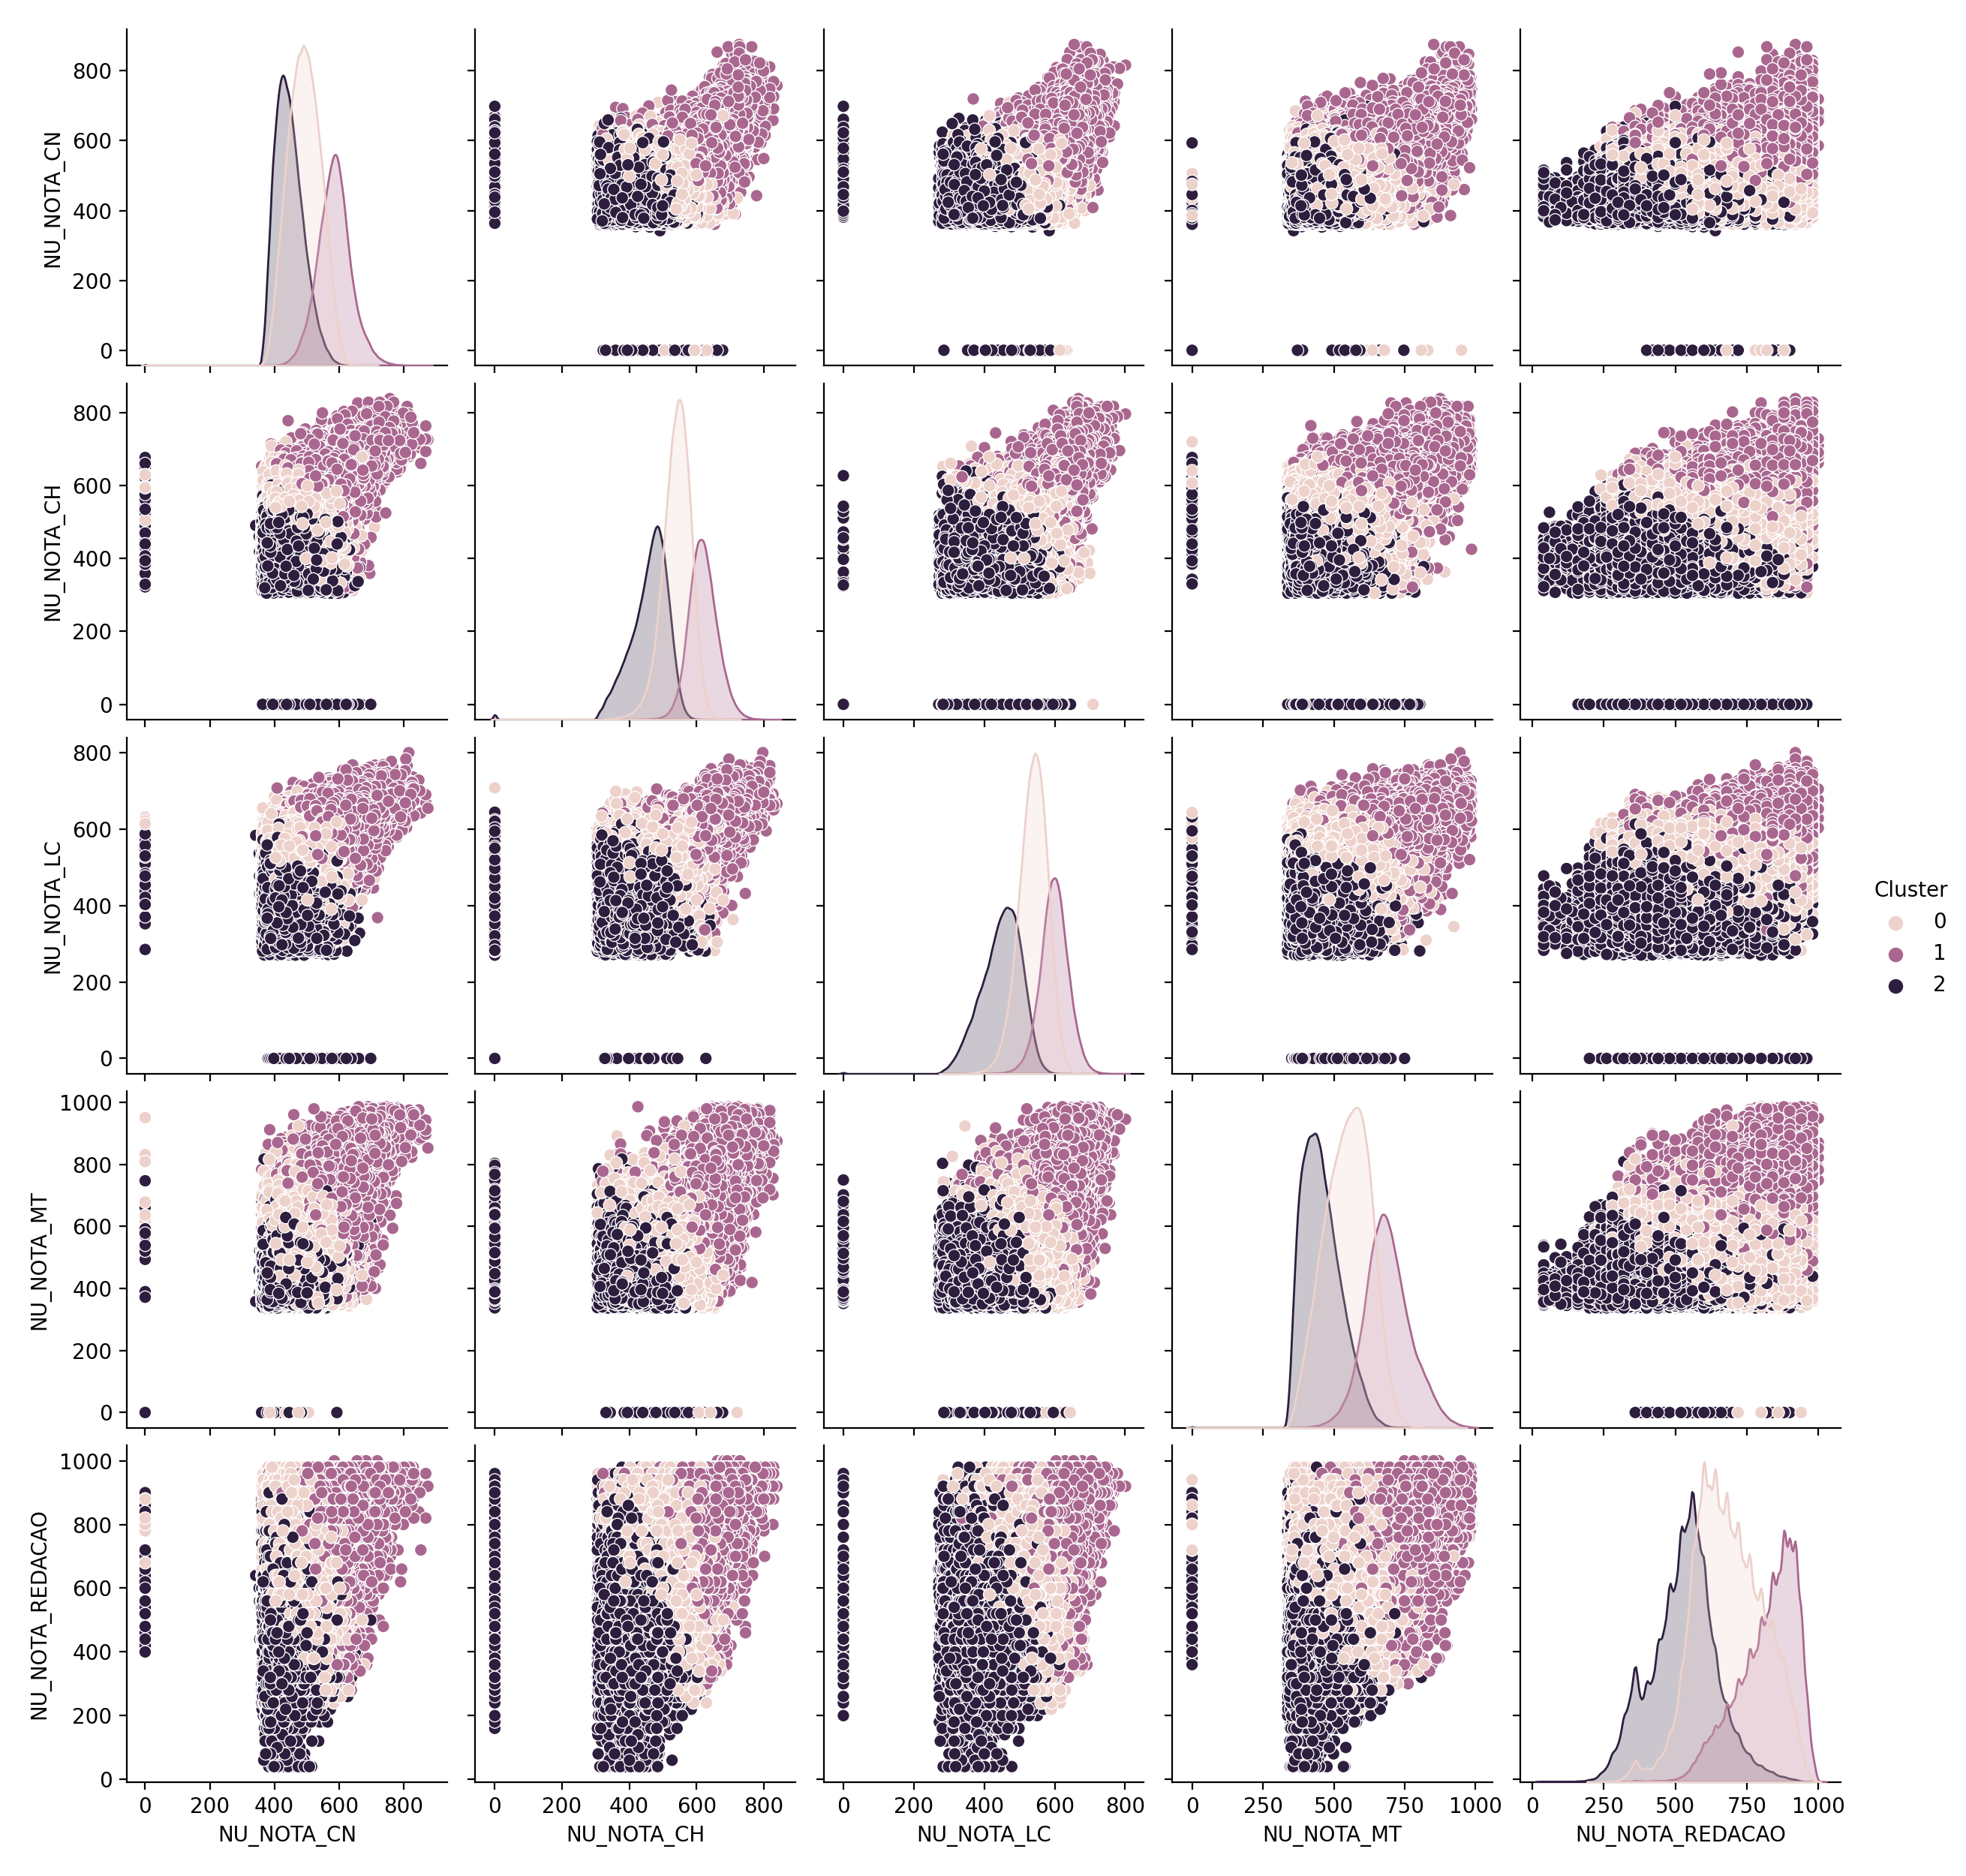

In [78]:
df_cluster = df1[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']]

# Normalizar os dados (opcional, mas muitas vezes é útil para algoritmos de clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cluster)

# Executar o algoritmo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Adicionar as etiquetas de cluster aos dados
df_cluster['Cluster'] = kmeans.labels_

# Plotar a matriz de dispersão colorida por cluster
sns.pairplot(df_cluster, hue='Cluster')
plt.show()

In [81]:
# Mostrar as observações em cada cluster identificado pelo PCA
for cluster_id in df_cluster['Cluster'].unique():
    print(f'Observações no Cluster {cluster_id}:')
    print(df_cluster[df_cluster['Cluster'] == cluster_id])
    print('\n')


Observações no Cluster 2:
         NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
40            436.7       420.0       512.6       430.4            560.0   
59            461.4       485.9       448.9       433.6            520.0   
67            427.8       485.0       557.5       438.0            540.0   
103           370.0       476.9       458.7       404.3            340.0   
122           386.3       482.4       357.7       458.8            380.0   
...             ...         ...         ...         ...              ...   
3475982       413.6       499.0       397.4       384.0            400.0   
3475986       475.0       434.7       482.7       491.6            500.0   
3476043       480.9       512.6       491.1       548.3            500.0   
3476063       488.6       513.2       447.6       543.9            520.0   
3476074       378.0       443.1       367.3       449.9            560.0   

         Cluster  
40             2  
59             2  
67  